In [57]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import modules.standard as standard
import modules.plotGraph as plotGraph
import modules.centrality as centrality
import math
import h5py


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


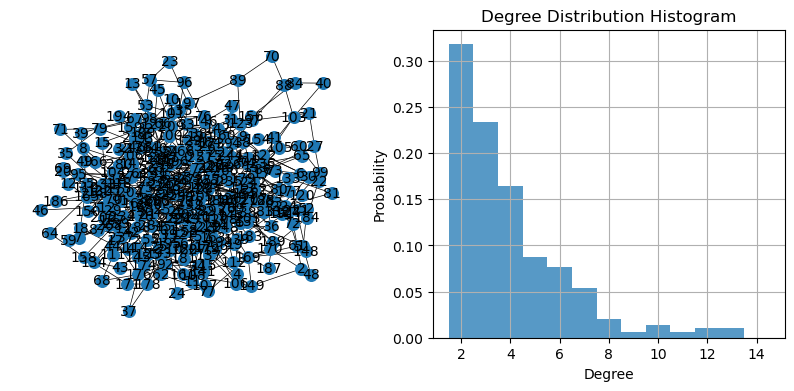

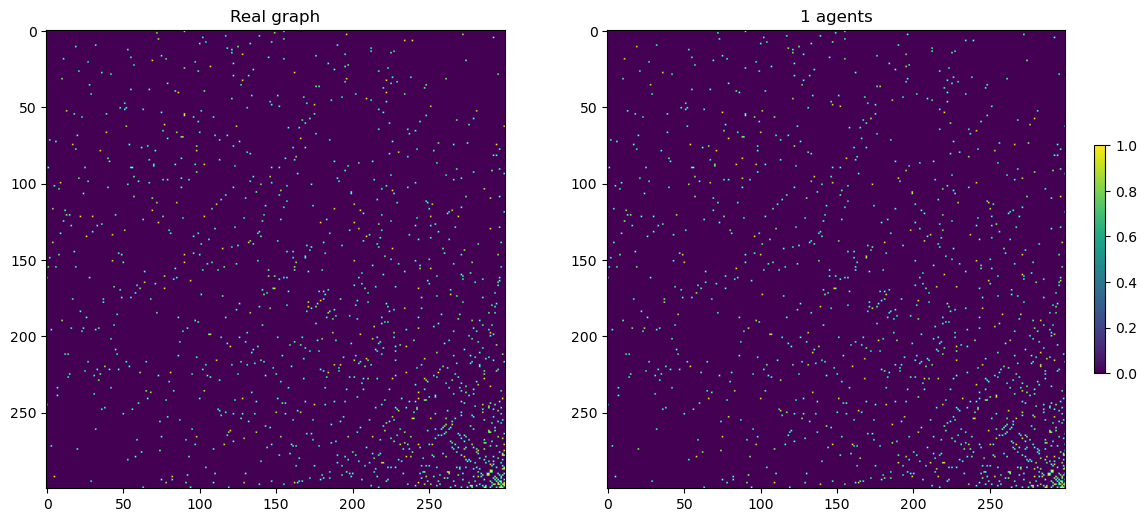

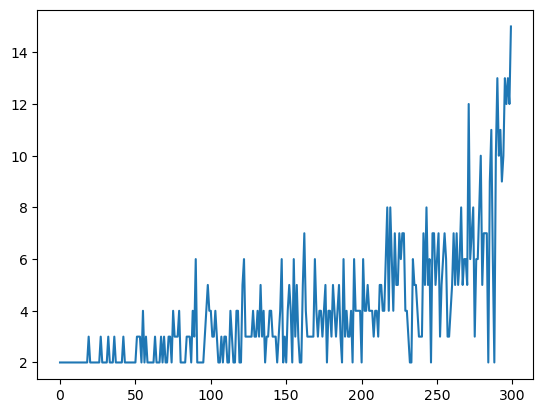

In [58]:
n= 300

graph= standard.generate_random_standard_graph(n, 2)

graphNumpy= nx.to_numpy_array(graph)

depend= np.sum(graphNumpy, axis= 0)

graph = nx.Graph(graphNumpy)


plotGraph.plot_spring_layout(graph)
plotGraph.plot_adjacenty(graphNumpy, [graphNumpy])

plt.plot(depend)

3


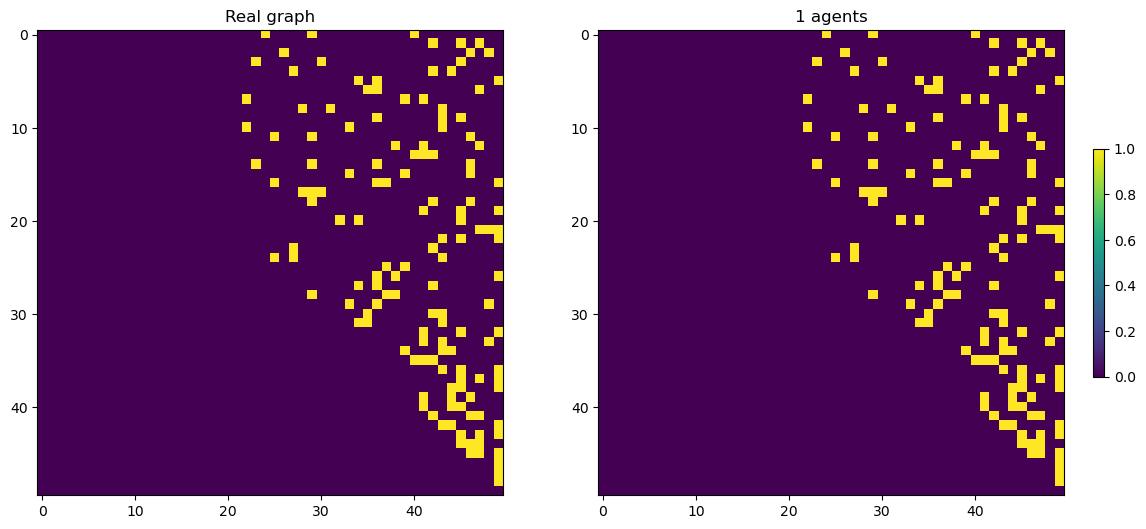

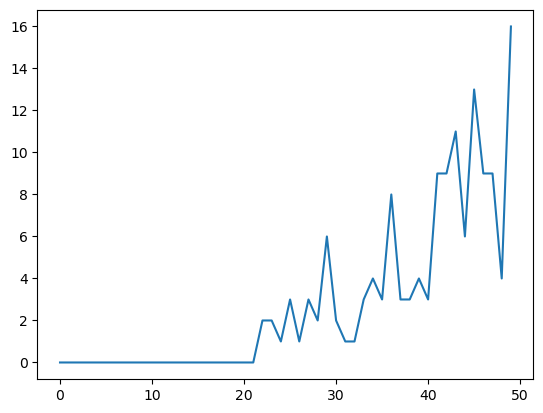

In [72]:
# Perform depth-first search traversal
# Print the traversal order
n= 50
m= int(math.log(n))
print(m)

#graph= standard.generate_random_standard_graph(n, m)
#graph= nx.watts_strogatz_graph(n, m*2, 0.1)
#graph= nx.dense_gnm_random_graph(n, m*n)
graph= nx.barabasi_albert_graph(n, m)

idS, exclude=standard.compress_left_order(nx.to_numpy_array(graph))
standardNP= standard.standardize(graph, traversal=list(idS)+list(exclude))# a kind of embedding,  150, 
standardGraph= nx.Graph(standardNP)
#print(standardNP)
depend= np.sum(standardNP, axis=0)
#plotGraph.plot_spring_layout(standardGraph)
plotGraph.plot_adjacenty(standardNP, [standardNP])
plt.plot(depend)

In [69]:
myEmbdedding=standard.power_m_embedding(standardNP, Precision= 5, length= 20, m= 0.5)


eigenvectorCentralityNp= centrality.eigenvector_centrality_embedding(standardGraph)
closenessCentralityNp= centrality.closeness_centrality_embedding(standardGraph)
degreeCentralityNp= centrality.degree_centrality_embedding(standardGraph)
loadCentralityNp= centrality.load_centrality_embedding(standardGraph)
betweennessCentralityNp= centrality.betweenness_centrality_embedding(standardGraph)
centralitys=[eigenvectorCentralityNp, closenessCentralityNp, degreeCentralityNp, loadCentralityNp, betweennessCentralityNp]
centralitysNp= np.stack(centralitys)



print(myEmbdedding.shape)
print(centralitysNp.shape)


with h5py.File('datas/list_example.h5', 'w') as f:#2500 matrices one file
    # Create a dataset from the NumPy array
    f.create_dataset('M1', data= myEmbdedding)
    f.create_dataset('C1', data= centralitysNp)

(100, 21)
(5, 50)
